# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

Using TensorFlow backend.


# Import Data

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define Image Size and Number of Classes

In [3]:
img_rows, img_cols = 28, 28
num_classes = 10

# Convert Data to Array type

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Data Pre-Processing: Reshaping

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model Architecture Definition

In [6]:
model = Sequential()

#Input Layer
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

#2nd Layer
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

#3rd Layer
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

#MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten
model.add(Flatten())

#Dense Neural Network
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Early Stopping Criteria

In [7]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=1)

# Compile Model

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

# Fit Model

In [9]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 53s 881us/step - loss: 0.3327 - acc: 0.8801 - val_loss: 0.3018 - val_acc: 0.8880
Epoch 2/30
60000/60000 [==============================] - 49s 810us/step - loss: 0.1990 - acc: 0.9273 - val_loss: 0.2680 - val_acc: 0.9039
Epoch 3/30
60000/60000 [==============================] - 49s 811us/step - loss: 0.1467 - acc: 0.9468 - val_loss: 0.2687 - val_acc: 0.9065
Epoch 4/30
60000/60000 [==============================] - 49s 809us/step - loss: 0.1055 - acc: 0.9619 - val_loss: 0.2893 - val_acc: 0.9101
Epoch 5/30
60000/60000 [==============================] - 49s 821us/step - loss: 0.0763 - acc: 0.9723 - val_loss: 0.2725 - val_acc: 0.9171
Epoch 6/30
60000/60000 [==============================] - 49s 811us/step - loss: 0.0523 - acc: 0.9816 - val_loss: 0.2779 - val_acc: 0.9199
Epoch 7/30
60000/60000 [==============================] - 49s 809us/step - loss: 0.0382 - acc: 0.9872 - val_loss: 0.

# Evaluate Model: Train and Test Accuracy

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
no_aug_train_acc = score[0]
no_aug_test_acc = score[1]
print('Train accuracy:', no_aug_train_acc)
print('Test accuracy:', no_aug_test_acc)

Train accuracy: 0.37649434734284876
Test accuracy: 0.9062


# Classification Report: No Augmentation

In [11]:
y_pred = model.predict_classes(x_test)


y_test_class = y_test.argmax(axis=-1)
print(classification_report(y_test_class,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.94      0.79      0.86      1000
           3       0.88      0.95      0.91      1000
           4       0.92      0.79      0.85      1000
           5       0.99      0.95      0.97      1000
           6       0.65      0.87      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.99      0.98      1000
           9       0.94      0.98      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



# Vertical Flip Data Augmentation

In [12]:
vertical_gen = ImageDataGenerator(fill_mode='nearest',
                                  vertical_flip=True)

In [13]:
#Flip Images Vertically
vertical_generator_train = vertical_gen.flow(x_train,y_train,batch_size=64)
vertical_generator_test = vertical_gen.flow(x_test,y_test,batch_size=64)

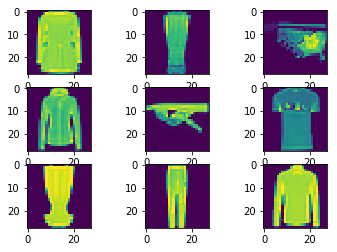

In [14]:
#Display flipped Images
for x_batch, y_batch in vertical_gen.flow(x_train, y_train, batch_size=9):
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(img_rows, img_cols))
    plt.show()
    break

In [15]:
#Improve Model
model.fit_generator(vertical_generator_train,
                    steps_per_epoch=60000//64,
                    epochs = 15,
                    validation_data=vertical_generator_test,
                    validation_steps=10000//64,
                    callbacks=[early_stop])

Epoch 1/15
937/937 [==============================] - 65s 70ms/step - loss: 0.2788 - acc: 0.9052 - val_loss: 0.3092 - val_acc: 0.8886
Epoch 2/15
937/937 [==============================] - 65s 70ms/step - loss: 0.1607 - acc: 0.9440 - val_loss: 0.3150 - val_acc: 0.8968
Epoch 3/15
937/937 [==============================] - 65s 69ms/step - loss: 0.1292 - acc: 0.9544 - val_loss: 0.2915 - val_acc: 0.9078
Epoch 4/15
937/937 [==============================] - 67s 71ms/step - loss: 0.1067 - acc: 0.9617 - val_loss: 0.2698 - val_acc: 0.9150
Epoch 5/15
937/937 [==============================] - 66s 70ms/step - loss: 0.0902 - acc: 0.9681 - val_loss: 0.2880 - val_acc: 0.9139
Epoch 6/15
937/937 [==============================] - 65s 70ms/step - loss: 0.0791 - acc: 0.9720 - val_loss: 0.2652 - val_acc: 0.9185
Epoch 7/15
937/937 [==============================] - 65s 69ms/step - loss: 0.0642 - acc: 0.9780 - val_loss: 0.3073 - val_acc: 0.9146
Epoch 8/15
937/937 [==============================] - 65s 69ms

In [16]:
#Evaluate Model
score = model.evaluate(x_test, y_test, verbose=0)
ver_aug_train_acc = score[0]
ver_aug_test_acc = score[1]
print('Train accuracy:', ver_aug_train_acc)
print('Test accuracy:', ver_aug_test_acc)

Train accuracy: 0.32474234215430914
Test accuracy: 0.919


# Classification Report: Vertical Flip Data Augmentation

In [17]:
y_pred = model.predict_classes(x_test)


y_test_class = y_test.argmax(axis=-1)
print(classification_report(y_test_class,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1000
           1       0.97      0.99      0.98      1000
           2       0.88      0.90      0.89      1000
           3       0.94      0.88      0.91      1000
           4       0.87      0.89      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.81      0.78      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Horizontal Flip Data Augmentation

In [18]:
horizontal_gen = ImageDataGenerator(fill_mode='nearest',
                                    horizontal_flip=True)

In [19]:
#Flip Images Horizontally
horizontal_generator_train = horizontal_gen.flow(x_train,y_train,batch_size=64)
horizontal_generator_test = horizontal_gen.flow(x_test,y_test,batch_size=64)

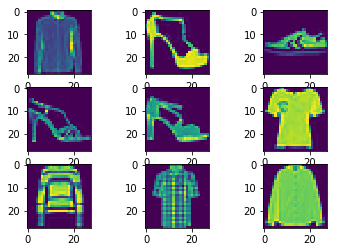

In [20]:
#Display flipped Images
for x_batch, y_batch in horizontal_gen.flow(x_train, y_train, batch_size=9):
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(img_rows, img_cols))
    plt.show()
    break

In [21]:
#Improve Model
model.fit_generator(horizontal_generator_train,
                    steps_per_epoch=60000//64,
                    epochs = 15,
                    validation_data=horizontal_generator_test,
                    validation_steps=10000//64,
                    callbacks=[early_stop])

Epoch 1/15
937/937 [==============================] - 65s 70ms/step - loss: 0.1698 - acc: 0.9466 - val_loss: 0.2421 - val_acc: 0.9205
Epoch 2/15
937/937 [==============================] - 65s 70ms/step - loss: 0.0882 - acc: 0.9701 - val_loss: 0.2405 - val_acc: 0.9251
Epoch 3/15
937/937 [==============================] - 65s 69ms/step - loss: 0.0657 - acc: 0.9777 - val_loss: 0.2569 - val_acc: 0.9206
Epoch 4/15
937/937 [==============================] - 65s 69ms/step - loss: 0.0489 - acc: 0.9830 - val_loss: 0.2687 - val_acc: 0.9258
Epoch 5/15
937/937 [==============================] - 65s 69ms/step - loss: 0.0429 - acc: 0.9858 - val_loss: 0.3005 - val_acc: 0.9199
Epoch 6/15
937/937 [==============================] - 65s 69ms/step - loss: 0.0339 - acc: 0.9886 - val_loss: 0.2748 - val_acc: 0.9303
Epoch 7/15
937/937 [==============================] - 65s 69ms/step - loss: 0.0313 - acc: 0.9891 - val_loss: 0.2969 - val_acc: 0.9316
Epoch 8/15
937/937 [==============================] - 65s 69ms

In [22]:
#Evaluate Model
score = model.evaluate(x_test, y_test, verbose=0)
hor_aug_train_acc = score[0]
hor_aug_test_acc = score[1]
print('Train accuracy:', hor_aug_train_acc)
print('Test accuracy:', hor_aug_test_acc)

Train accuracy: 0.32613087266488
Test accuracy: 0.9291


# Classification Report: Horizontal Flip Data Augmentation

In [23]:
y_pred = model.predict_classes(x_test)

y_test_class = y_test.argmax(axis=-1)
print(classification_report(y_test_class,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.93      0.89      1000
           3       0.93      0.92      0.93      1000
           4       0.88      0.91      0.90      1000
           5       0.99      0.96      0.98      1000
           6       0.84      0.77      0.80      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.97      0.97      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

